In [1]:
from Multiatomic import *

### Example 2: $\mathrm{O_2}$, Interpolated, Velocity-Verlet

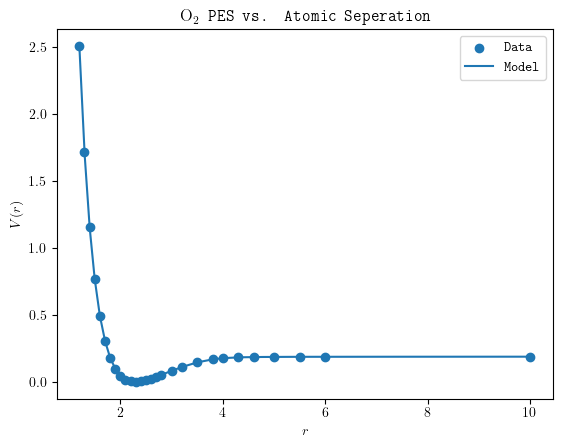

In [2]:
o2Data = np.genfromtxt('o2-potentials.dat', skip_header = 1, dtype = np.longdouble, delimiter = ' ')
xs = o2Data[:, 0]
ys = o2Data[:, 1]
noPoints = 1000
xPlot = np.linspace(np.min(xs), np.max(xs), noPoints)
yPlot = np.interp(xPlot, xs, ys)
plt.scatter(xs, ys, label = "Data")
plt.plot(xPlot, yPlot, label = "Model")
plt.xlabel("$r$")
plt.ylabel("$V(r)$")
plt.legend()
plt.title("$\mathrm{O_2}$ PES vs. Atomic Seperation")
plt.savefig("o2Pes")
plt.show()

In [3]:
def o2Interpolated(atoms, params) -> float:
    if (debugMode):
        if (not isinstance(atoms, np.ndarray)):
            raise RuntimeError("Invalid atoms. Must be a NumPy array.")
        if (len(atoms) != 2):
            raise RuntimeError("Invalid no. atoms. Must be 2.")
        for atom in atoms:
            if (not isinstance(atom, Atom)):
                raise RuntimeError("Invalid atoms. Must be Atom type.")
    r = atoms[0].getPosition() - atoms[1].getPosition()
    lengthOfR = np.linalg.norm(r)
    return np.interp(lengthOfR, xs, ys)

In [4]:
oMass = 15.994 # Dalton
atom1 = Atom("Atom1", oMass, np.array([-1.0, 0.0, 0.0]), np.array([0.0, 0.0, 0.0]), np.array([0.0, 0.0, 0.0]))
atom2 = Atom("Atom2", oMass, np.array([1.0, 0.0, 0.0]), np.array([0.0, 0.0, 0.0]), np.array([0.0, 0.0, 0.0]))
atoms = np.array([atom1, atom2])
potential = Potential(o2Interpolated)
molecularSystem = MolecularSystem(atoms, potential)
integratorName = "velocityVerlet"
filepath = thisdir / 'Multiatomic2'
N = 10000
deltaT = 0.001
startTime = time.time()
molecularSystem = simulate(filepath, molecularSystem, integratorName, N, deltaT)
endTime = time.time()
print("Simulation Time:", endTime - startTime, "seconds")

Simulation Time: 31.476760864257812 seconds


In [5]:
aspath = filepath / 'AtomicSeparations.csv'
avdir = filepath / 'AtomicVelocities'
enpath = filepath / 'Energies.csv'

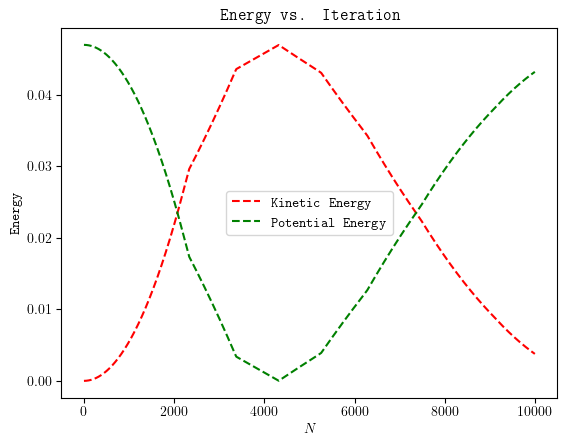

In [6]:
plotEnergies(enpath, "kp")

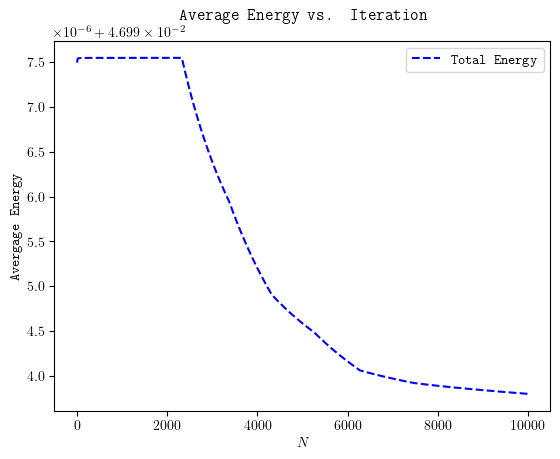

In [7]:
plotRunningAverageEnergies(enpath, "total")

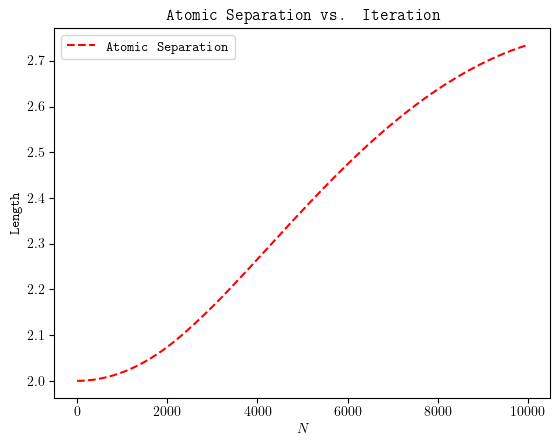

In [8]:
plotAtomicSeparations(aspath, "Atom1-Atom2")

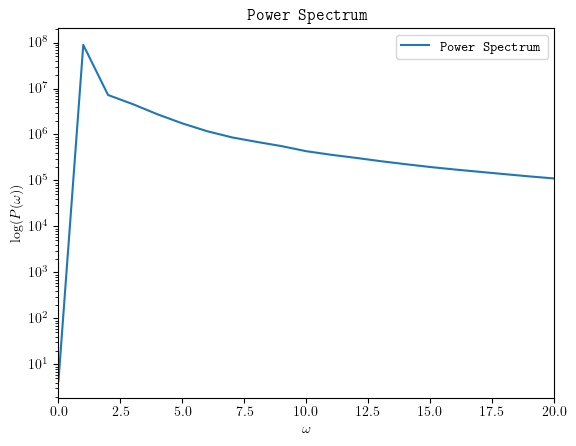

In [9]:
fileNames = molecularSystem.getAtomNames()
vacf = calculateVacf(avdir, fileNames)
powerSpectrum = calculatePowerSpectrum(vacf)
plotPowerSpectrum(avdir, powerSpectrum, [0.0, 20.0], True)

In [10]:
atomicSeparations = pd.read_csv(aspath)
energies = pd.read_csv(enpath)
vv = energies
print("Initial Total Energy:", energies["TE"].iat[0])
print("Final Total Energy:", energies["TE"].iat[-1])
print("Average Total Energy:", np.mean(energies["TE"]))
print("Std. Total Energy:", np.std(energies["TE"]))
print("Average Atomic Separation:", np.mean(atomicSeparations["Atom1-Atom2"]))
print("Std. Atomic Separation:", np.std(atomicSeparations["Atom1-Atom2"]))

Initial Total Energy: 0.0469974927213956
Final Total Energy: 0.0469934271014936
Average Total Energy: 0.04699380204535303
Std. Total Energy: 2.169334097849965e-06
Average Atomic Separation: 2.36288459674439
Std. Atomic Separation: 0.2496645851531151
